In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv('/run/media/devesh/Hard Disk/Projects/AI Crowd Blitz 2/LABOR/input/train.csv')
test = pd.read_csv('/run/media/devesh/Hard Disk/Projects/AI Crowd Blitz 2/LABOR/input/test.csv')

In [3]:
train.head()

duration  wage-increase-first-year  wage-increase-second-year  \
0         3                  3.597483                   4.000000   
1         3                  3.968619                   4.000000   
2         2                  6.328544                   5.089680   
3         2                  4.348288                   5.336979   
4         2                  3.530789                   2.892247   

   wage-increase-third-year  cost-of-living-adjustment  working-hours  \
0                  5.000000                          0      40.000000   
1                  5.100000                          1      40.000000   
2                  5.000000                          0      35.915468   
3                  5.000000                          0      37.651356   
4                  2.029438                          0      40.000000   

   pension  standby-pay  shift-differential  education-allowance  \
0        2      8.32238                 3.0                    0   
1        2      2.00000                 3.0                    0   
2        2      2.00000                 4.0                    0   
3        2      2.00000                 3.0                    0   
4        2      2.00000                 4.0                    0   

   statutory-holidays  vacation  longterm-disability-assistance  \
0                11.0         0                               1   
1                12.0         1                               1   
2                12.0         1                               1   
3                15.0         1                               1   
4                11.0         1                               1   

   contribution-to-dental-plan  bereavement-assistance  \
0                            1                       1   
1                            2                       1   
2                            1                       1   
3                            2                       1   
4                            1                       1   

   contribution-to-health-plan  class  
0                            2      1  
1                            2      1  
2                            2      1  
3                            2      1  
4                            2      1

In [6]:
df = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [7]:
df.isnull().sum()

duration                             0
wage-increase-first-year             0
wage-increase-second-year            0
wage-increase-third-year             0
cost-of-living-adjustment            0
working-hours                        0
pension                              0
standby-pay                          0
shift-differential                   0
education-allowance                  0
statutory-holidays                   0
vacation                             0
longterm-disability-assistance       0
contribution-to-dental-plan          0
bereavement-assistance               0
contribution-to-health-plan          0
class                             8000
dtype: int64

In [8]:
len(train)

31997

In [9]:
df.describe().T

count       mean       std        min  \
duration                        39997.0   2.155037  0.700671   1.000000   
wage-increase-first-year        39997.0   3.838531  1.341426   1.874780   
wage-increase-second-year       39997.0   3.975641  1.112805   1.416908   
wage-increase-third-year        39997.0   4.652502  0.886527  -0.193950   
cost-of-living-adjustment       39997.0   0.410506  0.710720   0.000000   
working-hours                   39997.0  38.204744  2.456128  25.082896   
pension                         39997.0   1.524389  0.801093   0.000000   
standby-pay                     39997.0   3.369856  3.408908  -4.136893   
shift-differential              39997.0   4.241165  3.807068 -15.721108   
education-allowance             39997.0   0.238643  0.426259   0.000000   
statutory-holidays              39997.0  11.327497  1.398748   8.087618   
vacation                        39997.0   0.880141  0.816610   0.000000   
longterm-disability-assistance  39997.0   0.850589  0.356498   0.000000   
contribution-to-dental-plan     39997.0   1.057979  0.646649   0.000000   
bereavement-assistance          39997.0   0.925494  0.262595   0.000000   
contribution-to-health-plan     39997.0   1.529640  0.716452   0.000000   
class                           31997.0   0.651467  0.476513   0.000000   

                                      25%        50%       75%        max  
duration                         2.000000   2.000000   3.00000   3.000000  
wage-increase-first-year         2.699161   3.850151   4.54060   8.343888  
wage-increase-second-year        3.108276   4.000000   4.54449   8.204728  
wage-increase-third-year         5.000000   5.000000   5.00000   6.341045  
cost-of-living-adjustment        0.000000   0.000000   1.00000   2.000000  
working-hours                   37.455729  39.000000  40.00000  43.118698  
pension                          1.000000   2.000000   2.00000   2.000000  
standby-pay                      2.000000   2.000000   2.00000  16.366398  
shift-differential               3.000000   3.000000   4.00000  35.320045  
education-allowance              0.000000   0.000000   0.00000   1.000000  
statutory-holidays              11.000000  11.000000  12.00000  15.000000  
vacation                         0.000000   1.000000   2.00000   2.000000  
longterm-disability-assistance   1.000000   1.000000   1.00000   1.000000  
contribution-to-dental-plan      1.000000   1.000000   1.00000   2.000000  
bereavement-assistance           1.000000   1.000000   1.00000   1.000000  
contribution-to-health-plan      1.000000   2.000000   2.00000   2.000000  
class                            0.000000   1.000000   1.00000   1.000000

In [30]:
cat_cols = ['duration', 'cost-of-living-adjustment', 'pension', 'vacation', 'contribution-to-dental-plan', 'contribution-to-health-plan']

In [10]:
df['wage-increase-first-year'] = df['wage-increase-first-year'] * 100
df['wage-increase-second-year'] = df['wage-increase-second-year'] * 100
df['wage-increase-third-year'] = df['wage-increase-third-year'] * 100

In [12]:
df.duration.value_counts()

2    19400
3    13399
1     7198
Name: duration, dtype: int64

In [22]:
train['class'].value_counts()

1    20845
0    11152
Name: class, dtype: int64

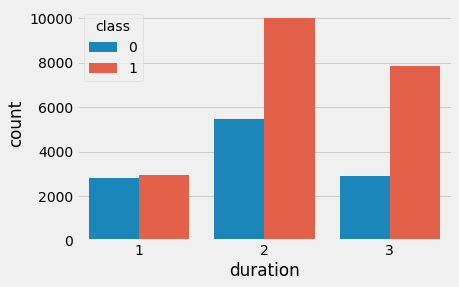

In [23]:
sns.countplot(train['duration'], hue = train['class'])

In [24]:
df['cost-of-living-adjustment'].unique()

array([0, 1, 2])

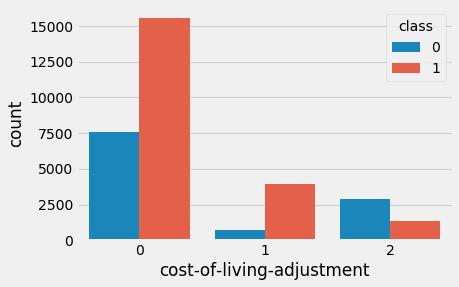

In [25]:
sns.countplot(train['cost-of-living-adjustment'], hue = train['class'])

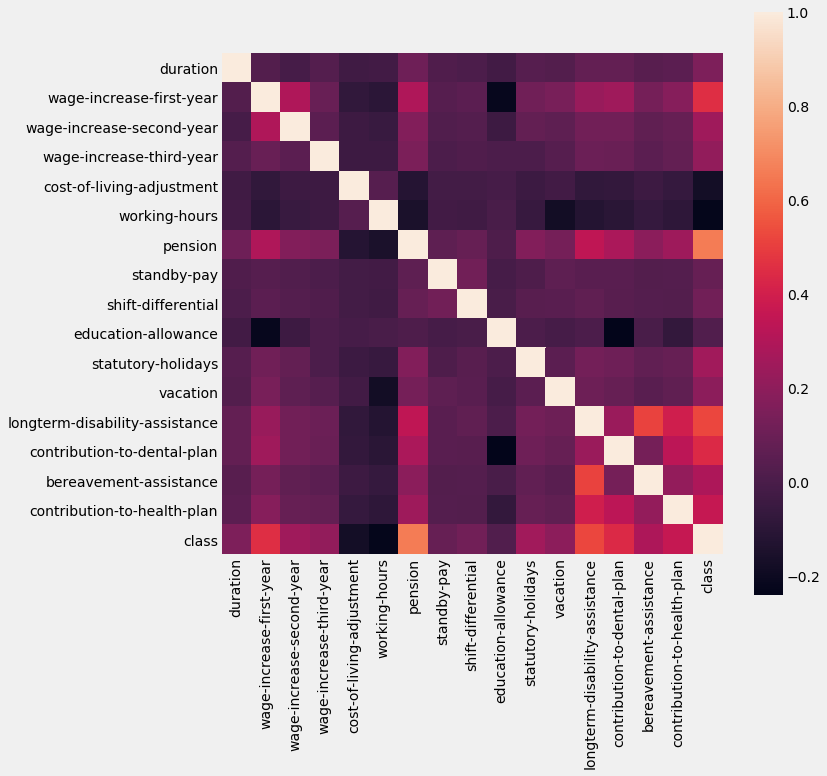

In [26]:
plt.figure(figsize = (10,10))

sns.heatmap(df[:len(train)].corr(), square = True)

In [27]:
df.pension.value_counts()

2    28820
0     7846
1     3331
Name: pension, dtype: int64

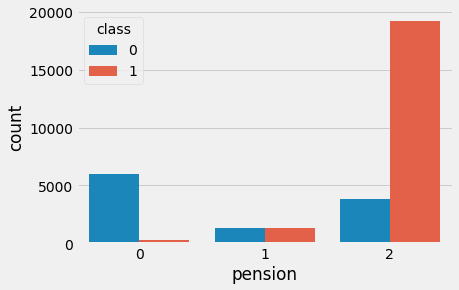

In [28]:
sns.countplot(train['pension'], hue = train['class'])

In [31]:
df.head(3)

duration  wage-increase-first-year  wage-increase-second-year  \
0         3                  359.7483                    400.000   
1         3                  396.8619                    400.000   
2         2                  632.8544                    508.968   

   wage-increase-third-year  cost-of-living-adjustment  working-hours  \
0                     500.0                          0      40.000000   
1                     510.0                          1      40.000000   
2                     500.0                          0      35.915468   

   pension  standby-pay  shift-differential  education-allowance  \
0        2      8.32238                 3.0                    0   
1        2      2.00000                 3.0                    0   
2        2      2.00000                 4.0                    0   

   statutory-holidays  vacation  longterm-disability-assistance  \
0                11.0         0                               1   
1                12.0         1                               1   
2                12.0         1                               1   

   contribution-to-dental-plan  bereavement-assistance  \
0                            1                       1   
1                            2                       1   
2                            1                       1   

   contribution-to-health-plan  class  
0                            2    1.0  
1                            2    1.0  
2                            2    1.0

In [32]:
df['avg_increase'] = (df['wage-increase-first-year'] + df['wage-increase-second-year'] + df['wage-increase-third-year'])/df['duration']

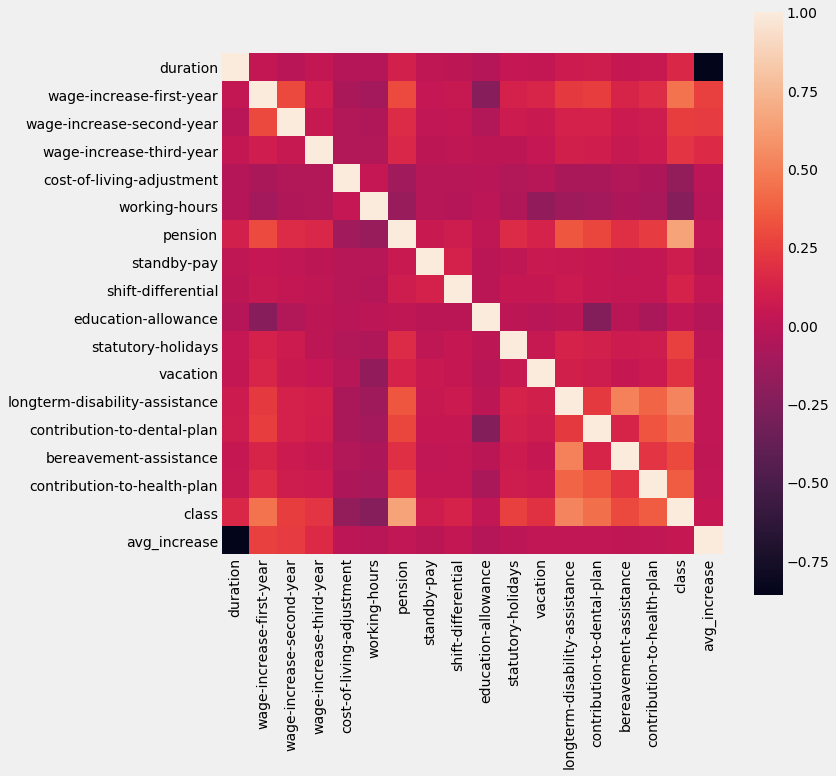

In [33]:
plt.figure(figsize = (10,10))

sns.heatmap(df[:len(train)].corr(), square = True)

In [34]:
df_cat = df.copy()

In [36]:
for cols in cat_cols:
    df_cat = pd.concat([df_cat, pd.get_dummies(df_cat[cols])], axis = 1)

In [37]:
df_cat.head()

duration  wage-increase-first-year  wage-increase-second-year  \
0         3                  359.7483                   400.0000   
1         3                  396.8619                   400.0000   
2         2                  632.8544                   508.9680   
3         2                  434.8288                   533.6979   
4         2                  353.0789                   289.2247   

   wage-increase-third-year  cost-of-living-adjustment  working-hours  \
0                  500.0000                          0      40.000000   
1                  510.0000                          1      40.000000   
2                  500.0000                          0      35.915468   
3                  500.0000                          0      37.651356   
4                  202.9438                          0      40.000000   

   pension  standby-pay  shift-differential  education-allowance  ...  2  0  \
0        2      8.32238                 3.0                    0  ...  1  1   
1        2      2.00000                 3.0                    0  ...  1  0   
2        2      2.00000                 4.0                    0  ...  1  0   
3        2      2.00000                 3.0                    0  ...  1  0   
4        2      2.00000                 4.0                    0  ...  1  0   

   1  2  0  1  2  0  1  2  
0  0  0  0  1  0  0  0  1  
1  1  0  0  0  1  0  0  1  
2  1  0  0  1  0  0  0  1  
3  1  0  0  0  1  0  0  1  
4  1  0  0  1  0  0  0  1  

[5 rows x 36 columns]

In [38]:
df_cat.to_csv('df_cat.csv', index = False)
df.to_csv('df.csv', index = False)